In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import time

In [ ]:
!unzip Dataset.zip

In [2]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 120 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [3]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# create CNN model

model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))  # Flatten the input image
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 25176321 (96.04 MB)
Trainable params: 25176321 (96.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
start_time = time.time()
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)
end_time = time.time()
training_time = end_time - start_time
print("\n")
print("Training time = ", training_time)

Epoch 1/20
4/4 [==============================] - 3s 117ms/step - loss: 18.0613 - accuracy: 0.4667 - val_loss: 9.2308 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 0s 76ms/step - loss: 9.5886 - accuracy: 0.5000 - val_loss: 2.8609 - val_accuracy: 0.5250
Epoch 3/20
4/4 [==============================] - 0s 73ms/step - loss: 10.7878 - accuracy: 0.5000 - val_loss: 2.6498 - val_accuracy: 0.4750
Epoch 4/20
4/4 [==============================] - 0s 49ms/step - loss: 9.9122 - accuracy: 0.5417 - val_loss: 5.2877 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 0s 74ms/step - loss: 8.4253 - accuracy: 0.4167 - val_loss: 2.5616 - val_accuracy: 0.5250
Epoch 6/20
4/4 [==============================] - 0s 79ms/step - loss: 6.2725 - accuracy: 0.4917 - val_loss: 3.1942 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 1s 78ms/step - loss: 3.1985 - accuracy: 0.5667 - val_loss: 2.0778 - val_accuracy: 0.6000
Epoch 8/20
4/4 [========

1/1 [==============================] - 0s 82ms/step


array([[0.]], dtype=float32)

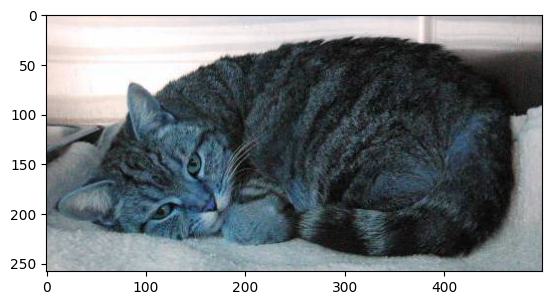

In [8]:
test_img1 = cv2.imread('/content/Dataset/test/cat/cat.76.jpg')
plt.imshow(test_img1)
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3))
model.predict(test_input1)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)

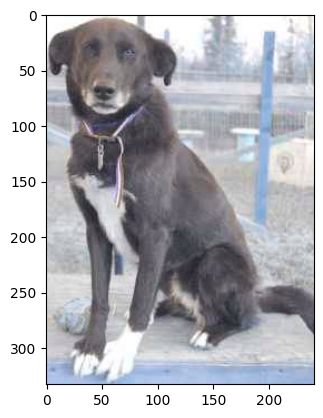

In [17]:
test_img2 = cv2.imread('/content/Dataset/test/dog/dog.1076.jpg')
plt.imshow(test_img2)
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))
model.predict(test_input2)

In [10]:
# Load test dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory='Dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Preprocess test data
test_ds = test_ds.map(process)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_ds)
# Log testing accuracy
tf.summary.scalar('test_accuracy', test_accuracy, step=60)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 40 files belonging to 2 classes.
2/2 [==============================] - 0s 14ms/step - loss: 1.2324 - accuracy: 0.5250
Test Loss: 1.2323505878448486
Test Accuracy: 0.5249999761581421


1/1 [==============================] - 0s 83ms/step


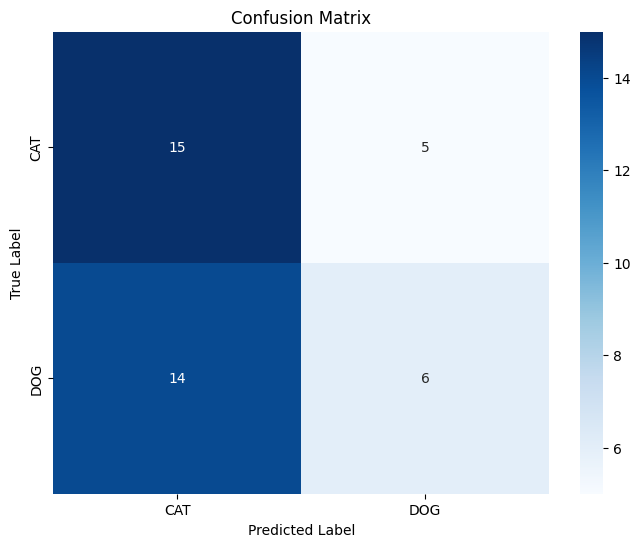

In [11]:
# Function to get predictions
def get_predictions(model, dataset):
    predictions = []
    labels = []
    for images, labels_batch in dataset:
        predictions_batch = model.predict(images)
        predictions.extend(np.round(predictions_batch).astype(int))
        labels.extend(labels_batch.numpy())
    return np.array(predictions).flatten(), np.array(labels)

# Get predictions for test data
test_predictions, test_labels = get_predictions(model, test_ds)

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CAT', 'DOG'], yticklabels=['CAT', 'DOG'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()